In [4]:
def m(X):
    if (X >= -1 and X<-0.5):
        return 0.5*((X+2)**2)
    elif (X >= -0.5 and X < 0):
        return (X/2) +0.875
    elif (X>0 and X<=0.5):
        return -5*((X-0.2)**2)+1.075
    elif (X>0.5 and X<1):
        return X+0.125
    else:
        return "error"

def sigma(X):
    return 0.2-(0.1*math.cos(2*math.pi*X))

def sim_data(n):
    data = []
    while len(data)<n:
        x = np.random.normal(0, 1, 1)
        if x <=1 and x>=-1:
            e=np.random.normal(0, 1, 1)
            y = m(x)+sigma(x)*e
            data.append([x,y]);
    return data

#creating x and y for model training
x=[]
y=[]
for i in sim_data(200):
    x.append(i[0])
    y.append(i[1])

print(x,y)

[array([0.19733875]), array([-0.92225278]), array([0.26742968]), array([0.07124719]), array([-0.13676115]), array([0.60354055]), array([0.20318833]), array([0.70638582]), array([0.45038241]), array([-0.1549208]), array([0.89955746]), array([0.68186724]), array([0.29867553]), array([-0.49932697]), array([0.71570637]), array([0.34220708]), array([-0.14666475]), array([0.21535304]), array([0.05562801]), array([0.84192492]), array([-0.82381034]), array([-0.63402037]), array([-0.98729201]), array([0.50766682]), array([-0.4650163]), array([0.39196196]), array([-0.41550745]), array([0.31389202]), array([-0.25079315]), array([0.04373627]), array([0.0740586]), array([0.04019391]), array([0.14479012]), array([0.43269304]), array([-0.07951809]), array([0.83771101]), array([0.15444451]), array([0.33724219]), array([-0.02692983]), array([0.21492115]), array([0.54200064]), array([0.59017987]), array([-0.78072315]), array([0.88715408]), array([-0.18912643]), array([0.90089724]), array([-0.40904093]),

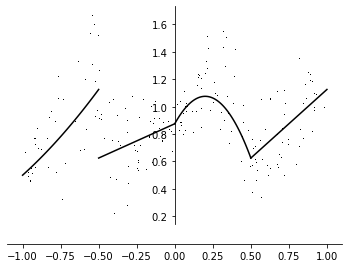

In [101]:
# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

for i in zip(x,y):
    plt.plot(i[0],i[1],',',color='black')

x1 = np.linspace(-1,-0.5,100)
x2 = np.linspace(-0.5,0,100)
x3 = np.linspace(0,0.5,100)
x4 = np.linspace(0.5,1,100)
def m1(x):
    return 0.5*((x+2)**2)
def m2(x):
    return (x/2) +0.875
def m3(x):
    return -5*(x-0.2)**2+1.075
def m4(x):
    return x+0.125

# plot the function
plt.plot(x1, m1(x1),'black')
plt.plot(x2, m2(x2),'black')
plt.plot(x3, m3(x3),'black')
plt.plot(x4, m4(x4),'black')

In [133]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import math
from matplotlib import pyplot as plt


#variables for network architecture
d=1
L=3

#defining the estimator
def neuralest(K):
    model = keras.Sequential()
    #input layer
    model.add(keras.layers.Dense(1, activation='relu', input_shape=(1,)))
    #hidden layers
    for i in np.arange(2):
        model.add(keras.layers.Dense(K, activation='relu'))
    #output layer
    model.add(keras.layers.Dense(1))
    model.compile(optimizer='adam',loss='mean_squared_error')
    #training the data
    model.fit(x=np.array(x),y=np.array(y),epochs=1000,batch_size=200,verbose=2)
    #defining xv 
    xv=np.linspace(-1,1,200, endpoint=False)
    #producing yv
    yv=model.predict(x=xv,batch_size=len(xv))
    return yv

yv=neuralest(150)


def yvleft(yv_sample):   
    while yv_sample[0]==yv_sample[15] or yv_sample[11]==yv_sample[32]:
        yv_sample=neuralest(150)
        print(yv_sample)
    return yv_sample

yvl=yvleft(yv)
print("yvl= ",yvl)

def yvright(yv_sample):
    while yv_sample[110]==yv_sample[115] or yv_sample[125]==yv_sample[180]:
        yv_sample=neuralest(150)
        print(yv_sample)
    return yv_sample

yvr=yvright(yv)
print("yvr= ",yvr)





Epoch 1/1000
1/1 - 0s - loss: 0.8740
Epoch 2/1000
1/1 - 0s - loss: 0.8446
Epoch 3/1000
1/1 - 0s - loss: 0.8165
Epoch 4/1000
1/1 - 0s - loss: 0.7893
Epoch 5/1000
1/1 - 0s - loss: 0.7631
Epoch 6/1000
1/1 - 0s - loss: 0.7375
Epoch 7/1000
1/1 - 0s - loss: 0.7121
Epoch 8/1000
1/1 - 0s - loss: 0.6867
Epoch 9/1000
1/1 - 0s - loss: 0.6612
Epoch 10/1000
1/1 - 0s - loss: 0.6353
Epoch 11/1000
1/1 - 0s - loss: 0.6089
Epoch 12/1000
1/1 - 0s - loss: 0.5823
Epoch 13/1000
1/1 - 0s - loss: 0.5554
Epoch 14/1000
1/1 - 0s - loss: 0.5286
Epoch 15/1000
1/1 - 0s - loss: 0.5016
Epoch 16/1000
1/1 - 0s - loss: 0.4747
Epoch 17/1000
1/1 - 0s - loss: 0.4481
Epoch 18/1000
1/1 - 0s - loss: 0.4220
Epoch 19/1000
1/1 - 0s - loss: 0.3965
Epoch 20/1000
1/1 - 0s - loss: 0.3718
Epoch 21/1000
1/1 - 0s - loss: 0.3483
Epoch 22/1000
1/1 - 0s - loss: 0.3259
Epoch 23/1000
1/1 - 0s - loss: 0.3050
Epoch 24/1000
1/1 - 0s - loss: 0.2859
Epoch 25/1000
1/1 - 0s - loss: 0.2687
Epoch 26/1000
1/1 - 0s - loss: 0.2537
Epoch 27/1000
1/1 - 0

In [117]:
print(yvl, yvr)

[[0.5519037 ]
 [0.55447984]
 [0.55706596]
 [0.55971825]
 [0.5633741 ]
 [0.57176256]
 [0.5852344 ]
 [0.5989789 ]
 [0.6127235 ]
 [0.6264672 ]
 [0.63997936]
 [0.65326256]
 [0.66654575]
 [0.679829  ]
 [0.6931121 ]
 [0.70639527]
 [0.71967846]
 [0.73296124]
 [0.7462445 ]
 [0.7595277 ]
 [0.7728105 ]
 [0.7860938 ]
 [0.7993767 ]
 [0.81265986]
 [0.8259431 ]
 [0.83922595]
 [0.852509  ]
 [0.8657921 ]
 [0.87907547]
 [0.89235854]
 [0.9056413 ]
 [0.9189247 ]
 [0.9322078 ]
 [0.94549084]
 [0.95877385]
 [0.9721011 ]
 [0.98605275]
 [1.0000132 ]
 [1.0139735 ]
 [1.0279415 ]
 [1.0419239 ]
 [1.0658333 ]
 [1.114874  ]
 [1.1639144 ]
 [1.2129548 ]
 [1.2619956 ]
 [1.2800157 ]
 [1.2314086 ]
 [1.180064  ]
 [1.1287146 ]
 [1.0773656 ]
 [1.0260165 ]
 [0.9756787 ]
 [0.93163425]
 [0.889387  ]
 [0.84713995]
 [0.804893  ]
 [0.7626458 ]
 [0.7203988 ]
 [0.6781516 ]
 [0.6371792 ]
 [0.6375738 ]
 [0.6426542 ]
 [0.6477345 ]
 [0.6528149 ]
 [0.6578953 ]
 [0.6629757 ]
 [0.66805613]
 [0.6731365 ]
 [0.6782169 ]
 [0.68329734]
 [0.68

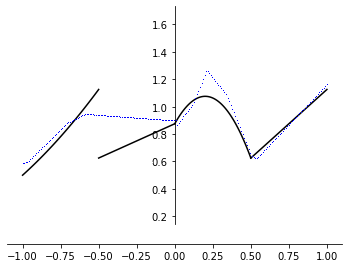

In [134]:
# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#data plot
for i in zip(x,y):
    plt.plot(i[0],i[1],',',color='white')

    
# 100 linearly spaced numbers    
x1 = np.linspace(-1,-0.5,100)
x2 = np.linspace(-0.5,0,100)
x3 = np.linspace(0,0.5,100)
x4 = np.linspace(0.5,1,100)
def m1(x):
    return 0.5*((x+2)**2)
def m2(x):
    return (x/2) +0.875
def m3(x):
    return -5*(x-0.2)**2+1.075
def m4(x):
    return x+0.125

# plot the function
plt.plot(x1, m1(x1),'black')
plt.plot(x2, m2(x2),'black')
plt.plot(x3, m3(x3),'black')
plt.plot(x4, m4(x4),'black')

yvnew=[]
for i in range(0,101):
    yvnew.append(yvl[i])
for i in range(101,200):
    yvnew.append(yvr[i])

for i in zip(xv,yv):
    plt.plot(i[0],i[1],',',color="blue")
    

In [135]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(yv, y)
print(mse)

0.10341553588395208


In [271]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error


#variables for network architecture

def estimator(neurons):
    d=1
    L=2
    #defining the estimator
    def neuralest(K):
        model = keras.Sequential()
        #input layer
        model.add(keras.layers.Dense(1, activation='relu', input_shape=(1,)))
        #hidden layers
        for i in np.arange(2):
            model.add(keras.layers.Dense(K, activation='relu'))
        #output layer
        model.add(keras.layers.Dense(1))
        model.compile(optimizer='adam',loss='mean_squared_error')
        #training the data
        model.fit(x=np.array(x),y=np.array(y),epochs=1000,batch_size=200,verbose=2)
        #defining xv 
        xv=np.linspace(-1,1,201, endpoint=False)[0:200]
        #producing yv
        yv=model.predict(x=xv,batch_size=len(xv))
        return yv

    yv=neuralest(neurons)


    def yvleft(yv_sample):   
        while yv_sample[0]==yv_sample[15] or yv_sample[11]==yv_sample[32]:
            yv_sample=neuralest(neurons)
            print(yv_sample)
        return yv_sample

    yvl=yvleft(yv)

    def yvright(yv_sample):
        while yv_sample[110]==yv_sample[115] or yv_sample[125]==yv_sample[180]:
            yv_sample=neuralest(neurons)
            print(yv_sample)
        return yv_sample

    yvr=yvright(yv)

    yvnew=[]
    for i in range(0,101):
        yvnew.append(yvl[i])
    for i in range(101,200):
        yvnew.append(yvr[i])
    mse1 = mean_squared_error(y,yvnew)
    return yvnew, mse1

best_yvnew,lowest_mse=estimator(50)
print(best_yvnew,lowest_mse)

def getmin():
    lowest_mse=1
    best_yvnew=[]
    mse_watch=[]
    for i in range(0,5):
        yvnew,mse1=estimator(50)
        if mse1<lowest_mse:
            lowest_mse=mse1
            best_yvnew=yvnew
            mse_watch.append(mse1)
    return best_yvnew, lowest_mse, mse_watch

#best_yvnew,lowest_mse, mse_watch =getmin()
#print(best_yvnew,lowest_mse, mse_watch)


Epoch 1/1000
1/1 - 0s - loss: 0.7883
Epoch 2/1000
1/1 - 0s - loss: 0.7655
Epoch 3/1000
1/1 - 0s - loss: 0.7434
Epoch 4/1000
1/1 - 0s - loss: 0.7219
Epoch 5/1000
1/1 - 0s - loss: 0.7011
Epoch 6/1000
1/1 - 0s - loss: 0.6807
Epoch 7/1000
1/1 - 0s - loss: 0.6607
Epoch 8/1000
1/1 - 0s - loss: 0.6412
Epoch 9/1000
1/1 - 0s - loss: 0.6221
Epoch 10/1000
1/1 - 0s - loss: 0.6035
Epoch 11/1000
1/1 - 0s - loss: 0.5855
Epoch 12/1000
1/1 - 0s - loss: 0.5681
Epoch 13/1000
1/1 - 0s - loss: 0.5513
Epoch 14/1000
1/1 - 0s - loss: 0.5351
Epoch 15/1000
1/1 - 0s - loss: 0.5193
Epoch 16/1000
1/1 - 0s - loss: 0.5040
Epoch 17/1000
1/1 - 0s - loss: 0.4890
Epoch 18/1000
1/1 - 0s - loss: 0.4747
Epoch 19/1000
1/1 - 0s - loss: 0.4609
Epoch 20/1000
1/1 - 0s - loss: 0.4479
Epoch 21/1000
1/1 - 0s - loss: 0.4354
Epoch 22/1000
1/1 - 0s - loss: 0.4237
Epoch 23/1000
1/1 - 0s - loss: 0.4127
Epoch 24/1000
1/1 - 0s - loss: 0.4023
Epoch 25/1000
1/1 - 0s - loss: 0.3926
Epoch 26/1000
1/1 - 0s - loss: 0.3836
Epoch 27/1000
1/1 - 0

L_2 error=  0.01869496022828185


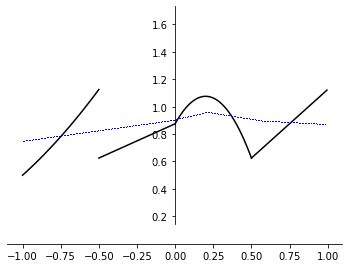

In [270]:
# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#data plot
for i in zip(x,y):
    plt.plot(i[0],i[1],',',color='white')

    
    # 100 linearly spaced numbers    
x1 = np.linspace(-1,-0.5,100)
x2 = np.linspace(-0.5,0,100)
x3 = np.linspace(0,0.5,100)
x4 = np.linspace(0.5,1,100, endpoint=False)
def m1(x):
    return 0.5*((x+2)**2)
def m2(x):
    return (x/2) +0.875
def m3(x):
    return -5*(x-0.2)**2+1.075
def m4(x):
    return x+0.125

# plot the function
plt.plot(x1, m1(x1),'black')
plt.plot(x2, m2(x2),'black')
plt.plot(x3, m3(x3),'black')
plt.plot(x4, m4(x4),'black')

yvnew=[]
for i in range(0,101):
    yvnew.append(yvl[i])
for i in range(101,200):
    yvnew.append(yvr[i])
    
yreg=[]
xv=np.linspace(-1,1,201, endpoint=False)[0:200]
for i in range(0,200):
    yreg.append(m(xv[i]))

for i in zip(xv,best_yvnew):
    plt.plot(i[0],i[1],',',color="blue")

print("L_2 error= ", mean_squared_error(list(best_yvnew),yreg))